A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

I wanted to create a "quick reference guide" for confusion matrix terminology because I couldn't find an existing resource that suited my requirements: compact in presentation, using numbers instead of arbitrary variables, and explained both in terms of formulas and sentences.

Let's start with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes):

Example confusion matrix for a binary classifier

![](images/confusion_matrix_simple2.png)

### What can we learn from this matrix?

* There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
* The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
* Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
* In reality, 105 patients in the sample have the disease, and 60 patients do not.

Let's now define the most basic terms, which are whole numbers (not rates):

* **true positives (TP):** These are cases in which we predicted yes (they have the disease), and they do have the disease.
* **true negatives (TN):** We predicted no, and they don't have the disease.
* **false positives (FP):** We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* **false negatives (FN):** We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

I've added these terms to the confusion matrix, and also added the row and column totals:
![](images/confusion_matrix2.png)

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

* **Accuracy:** Overall, how often is the classifier correct?
        * (TP+TN)/total = (100+50)/165 = 0.91
* **Misclassification Rate:** Overall, how often is it wrong?
        * (FP+FN)/total = (10+5)/165 = 0.09
        * equivalent to 1 minus Accuracy 
        * also known as "Error Rate"
* **True Positive Rate:** When it's actually yes, how often does it predict yes?
        * TP/actual yes = 100/105 = 0.95
        * also known as "Sensitivity" or "Recall"
* **False Positive Rate:** When it's actually no, how often does it predict yes?
        * FP/actual no = 10/60 = 0.17
* **True Negative Rate:** When it's actually no, how often does it predict no?
        * TN/actual no = 50/60 = 0.83
        * equivalent to 1 minus False Positive Rate
        * also known as "Specificity"
* **Precision:** When it predicts yes, how often is it correct?
        * TP/predicted yes = 100/110 = 0.91
* **Prevalence:** How often does the yes condition actually occur in our sample?
        * actual yes/total = 105/165 = 0.64

In [32]:
from sklearn.metrics import confusion_matrix,classification_report ,accuracy_score,jaccard_score
import numpy as np 

In [33]:
actual = np.array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
predicted = np.array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0] )

* Actual Data 
    * "Yes" : 4
    * "No"  : 7 
* Predicated Data 
    * "Yes" : 5
    * "No"  : 6

In [34]:
jaccard_score(actual,predicted) # 50 % of Data Is similar But invdule it different

0.5

In [26]:
results = confusion_matrix(actual, predicted) 

In [27]:
print('Confusion Matrix:')
print(results)

Confusion Matrix:
[[5 2]
 [1 3]]


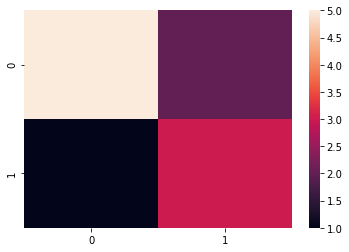

In [43]:
import seaborn as sns
sns.heatmap(results)

In [28]:
TP = results[0,0]
TN = results[0,1]
FP = results[1,0]
FN = results[1,1]

In [29]:
print(TP,TN,FP,FN)

5 2 1 3


In [30]:
total = len(actual)

In [37]:
acc = (TP+TN)/total  # Overall, how often is the classifier correct
acc

0.6363636363636364

In [39]:
print('Accuracy Score is a Overall, how often is the classifier correct :',accuracy_score(actual, predicted)) # Because of Normilization

Accuracy Score is a Overall, how often is the classifier correct : 0.7272727272727273


In [10]:
print('Report : ')
print(classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



![](https://lh3.googleusercontent.com/-wcAWI8mtuG4/Xu2EmAsug_I/AAAAAAAAorM/QGgoFya5O9A9_5g71P81kQpof2a1k8EUwCK8BGAsYHg/s0/2020-06-19.png)

In [42]:
Prevalence = actual/total
print("How often does the yes condition actually occur in our sample:")
print(Prevalence)

How often does the yes condition actually occur in our sample:
[0.09090909 0.09090909 0.         0.09090909 0.         0.
 0.09090909 0.         0.         0.         0.        ]


In [50]:
Precision = TP/TP+FP
print("When it predicts yes, how often is it correct",Precision)

When it predicts yes, how often is it correct 2.0
